# COVID-19 US Data Visualization


The purpose of this notebook is to perform some data visualization of COVID-19 data for US states and territories gathered from https://covidtracking.com. While there is no modeling in this notebook, I'm hoping to learn some interesting trends from visualizations of the data.

This notebook will be broken into three main components.

* Import the pertinent packages and load the data, then perform some basic data exploration
* Perform a more in depth EDA
* Generate some significant images

In [1]:
# Import the pertinent packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from ipywidgets import interact, interact_manual, IntSlider
import ipywidgets as widgets
from IPython.display import clear_output
%matplotlib inline

In [2]:
#Read in the data
jsData = pd.read_json('https://covidtracking.com/api/states/daily', convert_dates=True)
#Format the date
jsData['date'] = pd.to_datetime(jsData['date'].apply(str), format='%Y%m%d')
#I'm going to read in a separate file that contains 2018 census data for state population
pop = pd.read_excel('Data/PopulationData.xlsx')

In [3]:
#I'm going to create a few new variables that consist of testing ratios and positive tests per capita

#Generate a couple features - Positive Test Ratio and Negative Test Ratio
jsData['posRatio'] = jsData.positive/jsData.total
jsData['negRatio'] = jsData.negative/jsData.total

#%% Add population data
jsData['Population'] = 0

for state in pop['State'].unique():
    jsData.loc[jsData['state']==state, 'Population'] = pop[pop['State']==state]['POPESTIMATE2019'].values[0]

jsData['positivePerCapita'] = jsData.positive/jsData.Population
jsData['hospitalizationsPerCapita'] = jsData.hospitalizedCurrently/jsData.Population
jsData['deathsPerCapita'] = jsData.death/jsData.Population
jsData['currentHospPerCapita'] = jsData.hospitalizedCurrently/jsData.Population
jsData['hospitalizedCumPerCapita'] = jsData.hospitalizedCumulative/jsData.Population
jsData['hospitalizationRate'] = jsData.hospitalizedCumulative/jsData.positive
#I'm onlny going to consider US states, and the data includes Virgin Islands, Guam and American Samoa and a few others. I'll drop them. 
states = set(pop['State'])
dfStates = set(jsData.state.unique())
diffStates = dfStates.difference(states)
if len(diffStates) > 0:
    for state in diffStates:
        jsData.drop(jsData[jsData['state'] == state].index, inplace = True)

In [4]:
jsData.columns

Index(['date', 'state', 'positive', 'probableCases', 'negative', 'pending',
       'totalTestResultsSource', 'totalTestResults', 'hospitalizedCurrently',
       'hospitalizedCumulative', 'inIcuCurrently', 'inIcuCumulative',
       'onVentilatorCurrently', 'onVentilatorCumulative', 'recovered',
       'dataQualityGrade', 'lastUpdateEt', 'dateModified', 'checkTimeEt',
       'death', 'hospitalized', 'dateChecked', 'totalTestsViral',
       'positiveTestsViral', 'negativeTestsViral', 'positiveCasesViral',
       'deathConfirmed', 'deathProbable', 'totalTestEncountersViral',
       'totalTestsPeopleViral', 'totalTestsAntibody', 'positiveTestsAntibody',
       'negativeTestsAntibody', 'totalTestsPeopleAntibody',
       'positiveTestsPeopleAntibody', 'negativeTestsPeopleAntibody',
       'totalTestsPeopleAntigen', 'positiveTestsPeopleAntigen',
       'totalTestsAntigen', 'positiveTestsAntigen', 'fips', 'positiveIncrease',
       'negativeIncrease', 'total', 'totalTestResultsIncrease', 'posNe

In [5]:
#Define a state to look at to further understand the variables

state = 'CO'

### EDA

I want to take a look at some of the relationships between the fields in the data set. I'm looking for any interesting relationships between the variables that I can dig into a little deeper with some more involved visualizations. 

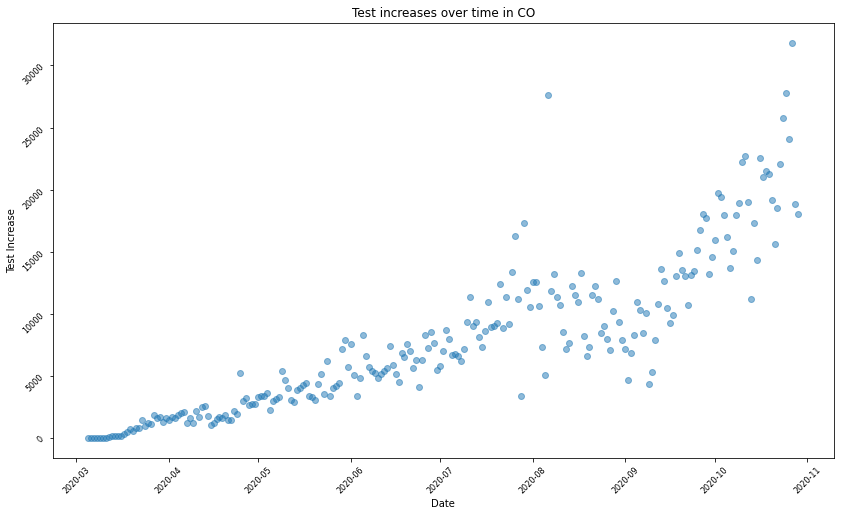

In [6]:
fig = plt.figure(figsize = (14, 8))
_ = plt.scatter(jsData[jsData['state'] == state]['date'], jsData[jsData['state'] == state]['totalTestResultsIncrease'], alpha = 0.5)
_ = plt.title('Test increases over time in ' + state)
_ = plt.xticks(rotation = 45, fontsize = 8)
_ = plt.yticks(rotation = 45, fontsize = 8)
_ = plt.xlabel('Date')
_ = plt.ylabel('Test Increase')

Obviously there is a quasi-linear relationship between the number of tests performed daily over time. The further we get into the pandemic, the more tests are performed on a daily basis. It would make sense that as the number of tests increases, so would the number of positive tests. I'll look into that next. 

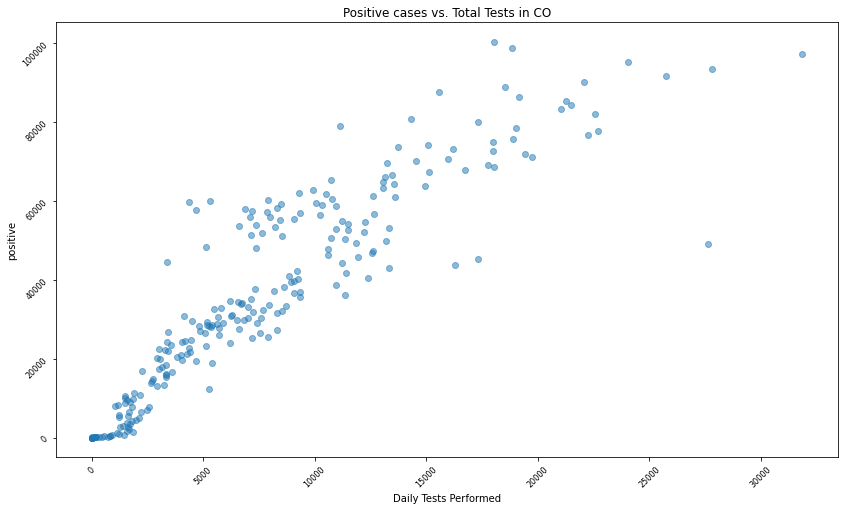

In [7]:
fig = plt.figure(figsize = (14, 8))
_ = plt.scatter(jsData[jsData['state'] == state]['totalTestResultsIncrease'], jsData[jsData['state'] == state]['positive'], alpha = 0.5)
_ = plt.title('Positive cases vs. Total Tests in ' + state)
_ = plt.xticks(rotation = 45, fontsize = 8)
_ = plt.yticks(rotation = 45, fontsize = 8)
_ = plt.xlabel('Daily Tests Performed')
_ = plt.ylabel('positive')

It looks like our suspicions are confirmed. As the number of daily tests increases, the number of positive tests increases. This relationship may also be linear, which would also make sense. It would also make sense that the relationship between the total positve tests and the total number of tests would be linear. We'll look into that next. 

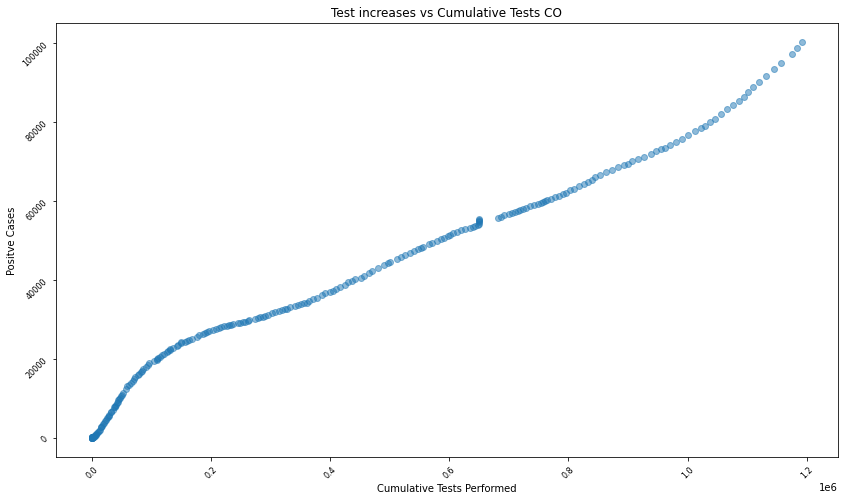

In [8]:
fig = plt.figure(figsize = (14, 8))
_ = plt.scatter(jsData[jsData['state'] == state]['total'], jsData[jsData['state'] == state]['positive'], alpha = 0.5)
_ = plt.title('Test increases vs Cumulative Tests ' + state)
_ = plt.xticks(rotation = 45, fontsize = 8)
_ = plt.yticks(rotation = 45, fontsize = 8)
_ = plt.xlabel('Cumulative Tests Performed')
_ = plt.ylabel('Positve Cases')

It seems the relationship does appear to be linear or near linear. We already know that the positive cases increase with increasing daily testing, but I'm curious to see the relationship between daily increases in testing and daily increases in postive cases. 

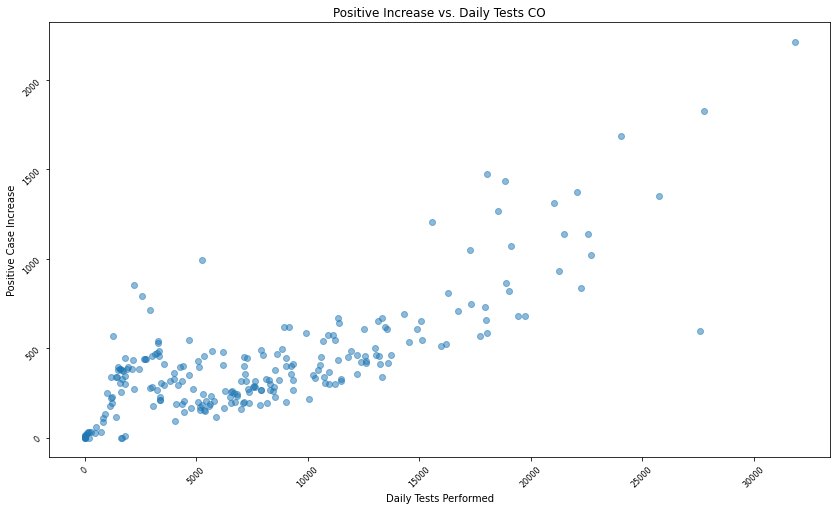

In [9]:
fig = plt.figure(figsize = (14, 8))
_ = plt.scatter(jsData[jsData['state'] == state]['totalTestResultsIncrease'], jsData[jsData['state'] == state]['positiveIncrease'], alpha = 0.5)
_ = plt.title('Positive Increase vs. Daily Tests ' + state)
_ = plt.xticks(rotation = 45, fontsize = 8)
_ = plt.yticks(rotation = 45, fontsize = 8)
_ = plt.xlabel('Daily Tests Performed')
_ = plt.ylabel('Positive Case Increase')

Once again, it makes sense that the relationship between daily increases and daily tests would be linear. Next, lets take a look at the relationship between positive and negative test results. Obviously the relationship between negative tests and overall tests will be linear, but I'm curious about the ratio of positve to negative tests and how they have changed over time. 



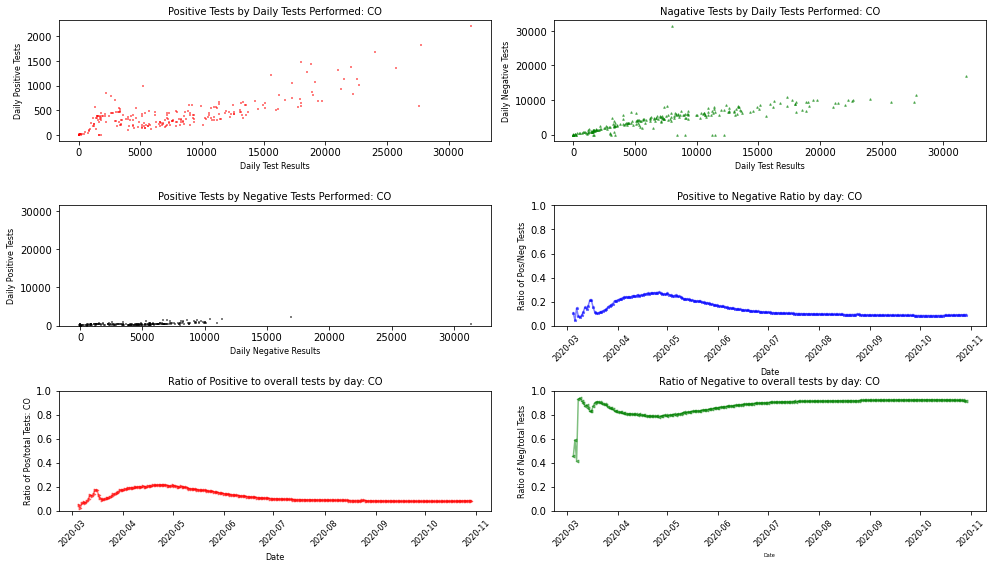

In [10]:
fig = plt.figure(figsize = (14, 8))
ST = jsData[jsData['state'] == state]
_=plt.tight_layout()
_=plt.subplot(3, 2, 1)
_=plt.tight_layout()
_=plt.scatter(ST.totalTestResultsIncrease, ST.positiveIncrease, color = 'r', marker='+', s = 3, alpha = 0.5)
_=plt.xlabel('Daily Test Results', fontsize = 8)
_=plt.ylabel('Daily Positive Tests', fontsize = 8)
_=plt.title('Positive Tests by Daily Tests Performed: ' + ST.state.mode()[0], fontsize = 10)
_=plt.subplot(3, 2, 2)
_=plt.tight_layout()
_=plt.scatter(ST.totalTestResultsIncrease, ST.negativeIncrease, color = 'g', s = 3, marker='^', alpha = 0.5)
_=plt.xlabel('Daily Test Results', fontsize = 8)
_=plt.ylabel('Daily Negative Tests', fontsize = 8)
_=plt.title('Nagative Tests by Daily Tests Performed: ' + ST.state.mode()[0], fontsize = 10)
_=plt.subplot(3, 2, 3)
_=plt.tight_layout()
_=plt.ylim(0, max(ST.negativeIncrease))
_=plt.scatter(ST.negativeIncrease, ST.positiveIncrease, color = 'k', s = 3, marker = '+', alpha = 0.5)
_=plt.xlabel('Daily Negative Results', fontsize = 8)
_=plt.ylabel('Daily Positive Tests', fontsize = 8)
_=plt.title('Positive Tests by Negative Tests Performed: ' + ST.state.mode()[0], fontsize = 10)
_=plt.subplot(3, 2, 4)
_=plt.tight_layout()
_=plt.plot(ST.date, ST.positive/ST.negative, color = 'b', marker = '*', markersize = 3, alpha = 0.5)
_=plt.xlabel('Date', fontsize = 8)
_=plt.ylabel('Ratio of Pos/Neg Tests', fontsize = 8)
_=plt.title('Positive to Negative Ratio by day: ' + ST.state.mode()[0], fontsize = 10)
_=plt.xticks(fontsize=8, rotation = 45)
_=plt.ylim(0, 1)
_=plt.subplot(3, 2, 5)
_=plt.tight_layout()
_=plt.plot(ST.date, ST.posRatio, color = 'r', marker = '>', markersize = 3, alpha = 0.5)
_=plt.xlabel('Date', fontsize = 8)
_=plt.ylabel('Ratio of Pos/total Tests: ' + ST.state.mode()[0], fontsize = 8)
_=plt.title('Ratio of Positive to overall tests by day: ' + ST.state.mode()[0], fontsize = 10)
_=plt.xticks(fontsize=8, rotation = 45)
_=plt.ylim(0, 1)
_=plt.subplot(3, 2, 6)
_=plt.tight_layout()
_=plt.plot(ST.date, ST.negRatio, color = 'g', marker = '<', markersize = 3, alpha = 0.5)
_=plt.xlabel('Date', fontsize = 5)
_=plt.ylabel('Ratio of Neg/total Tests', fontsize = 8)
_=plt.title('Ratio of Negative to overall tests by day: ' + ST.state.mode()[0], fontsize = 10)
_=plt.xticks(fontsize=8, rotation = 45)
_=plt.ylim(0,1)

Interesting, it looks like the vast majority of tests are negative, but this relationship has not been static over time. It looks like the ratio of positive tests peaked at 20% in Colorado in May and has been approaching ~10% since then.

Now that we have a good understanding of the relationship between positive infections and testing, we can take a look at the relationship between hospitalizations and positive cases. 

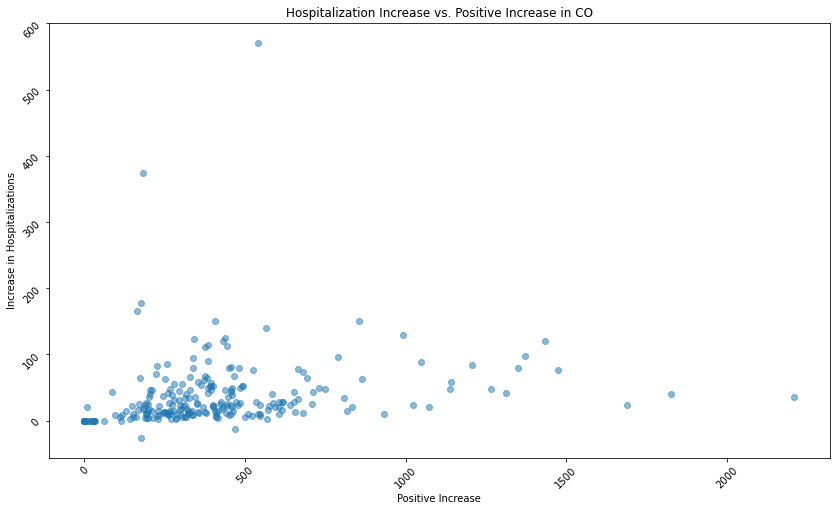

In [11]:
fig = plt.figure(figsize = (14, 8))
_ = plt.scatter(jsData[jsData['state'] == state]['positiveIncrease'], jsData[jsData['state'] == state]['hospitalizedIncrease'], alpha = 0.5)
_ = plt.title('Hospitalization Increase vs. Positive Increase in ' + state)
_ = plt.xticks(rotation = 45, fontsize = 10)
_ = plt.yticks(rotation = 45, fontsize = 10)
_ = plt.xlabel('Positive Increase')
_ = plt.ylabel('Increase in Hospitalizations')

There is likely a linear relationship between increased positive increases and increased hospitalizations. I'm curious about how cumulative and daily hospitalizations have changed over time. 

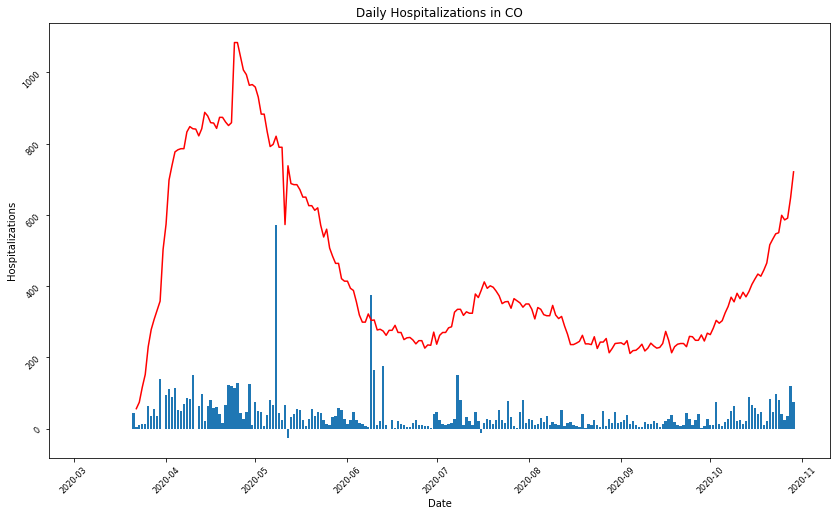

In [12]:
fig = plt.figure(figsize = (14, 8))
_ = plt.bar(ST['date'], ST['hospitalizedIncrease'])
_ = plt.plot(ST['date'], ST['hospitalizedCurrently'], 'r-', label = 'Current Hospitalized')
_ = plt.title('Daily Hospitalizations in ' + ST.state.mode()[0])
_ = plt.xlabel('Date')
_ = plt.ylabel('Hospitalizations')
_ = plt.xticks(rotation = 45, fontsize = 8)
_ = plt.yticks(rotation = 45, fontsize = 8)


Finally I'll quickly look at how daily deaths have changed over time. 

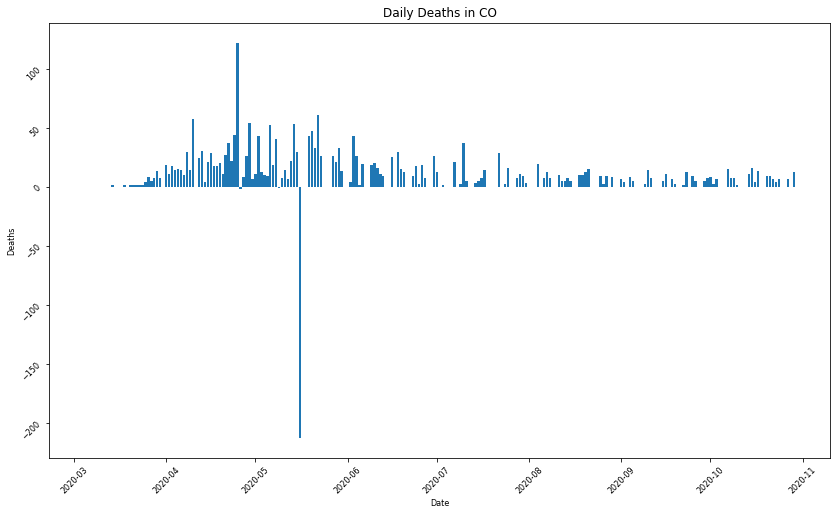

In [13]:
fig = plt.figure(figsize = (14, 8))
_ = plt.bar(ST['date'], ST['deathIncrease'])
_ = plt.title('Daily Deaths in ' + state)
_ = plt.xlabel('Date', fontsize = 8)
_ = plt.ylabel('Deaths', fontsize = 8)
_ = plt.xticks(rotation = 45, fontsize = 8)
_ = plt.yticks(rotation = 45, fontsize = 8)


It would be useful to have a tool that would allow us to compare some of these graphs between states. 

In [14]:

import matplotlib.pyplot as plt
def unique_sorted_states(array):
    unique = array.unique().tolist()
    unique.sort()
    return unique

drop_down_state = widgets.Dropdown(options = unique_sorted_states(jsData.state))

def dropdown_plot(change):
    clear_output(wait = True)
    ST = jsData[jsData['state'] == change.new]
    fig = plt.figure(figsize = (14, 8))
    plt.subplot(3, 2, 1)
    _ = plt.scatter(ST['date'], ST['positive'], alpha = 0.5)
    _ = plt.title('Case increases over time in ' + change.new)
    _ = plt.xticks(rotation = 45, fontsize = 8)
    _ = plt.yticks(rotation = 45, fontsize = 8)
    _ = plt.xlabel('Date')
    _ = plt.ylabel('Total Cases')
    _ = plt.tight_layout()
    plt.subplot(3, 2, 2)
    _ = plt.bar(ST['date'], ST['hospitalizedIncrease'])
    _ = plt.plot(ST['date'], ST['hospitalizedCurrently'], 'r-', label = 'Current Hospitalized')
    _ = plt.title('Daily Hospitalizations in ' + change.new)
    _ = plt.xlabel('Date')
    _ = plt.ylabel('Hospitalizations')
    _ = plt.xticks(rotation = 45, fontsize = 8)
    _ = plt.yticks(rotation = 45, fontsize = 8)
    plt.subplot(3, 2, 3)
    _ = plt.scatter(ST['date'], ST['totalTestResultsIncrease'], alpha = 0.5)
    _ = plt.title('Test increases over time in ' + change.new)
    _ = plt.xticks(rotation = 45, fontsize = 8)
    _ = plt.yticks(rotation = 45, fontsize = 8)
    _ = plt.xlabel('Date')
    _ = plt.ylabel('Test Increase')
    _ = plt.draw()
    _ = plt.tight_layout()
    plt.subplot(3, 2, 4)
    _ = plt.scatter(ST['positiveIncrease'], ST['hospitalizedIncrease'], alpha = 0.5)
    _ = plt.title('Test increases over time in ' + change.new)
    _ = plt.xticks(rotation = 45, fontsize = 8)
    _ = plt.yticks(rotation = 45, fontsize = 8)
    _ = plt.xlabel('Increase in Positve Tests')
    _ = plt.ylabel('Increase in Hospitalizations')
    _ = plt.tight_layout()
    plt.subplot(3, 2, 5)
    _ = plt.bar(ST['date'], ST['positiveIncrease'], alpha = 0.5)
    _ = plt.title('Daily increase over time in ' + change.new)
    _ = plt.xticks(rotation = 45, fontsize = 8)
    _ = plt.yticks(rotation = 45, fontsize = 8)
    _ = plt.xlabel('Date')
    _ = plt.ylabel('Positive Increase')
    _ = plt.tight_layout()
    _ = plt.draw()
    plt.subplot(3, 2, 6)
    #_ = plt.plot(ST['date'], ST['death'], 'r-', label = 'Cumulative Deaths')
    _ = plt.bar(ST['date'], ST['deathIncrease'])
    _ = plt.title('Deaths over time ' + change.new)
    _ = plt.xticks(rotation = 45, fontsize = 8)
    _ = plt.yticks(rotation = 45, fontsize = 8)
    _ = plt.xlabel('Date')
    _ = plt.ylabel('deaths')
    _ = plt.tight_layout()
    _ = plt.draw()
    display(drop_down_state)


drop_down_state.observe(dropdown_plot, names = 'value')
display(drop_down_state)



Dropdown(options=('AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'I…

### In-Depth Visualizations

Now that I've found some relationships in the data for an individual states I want to see about finding a way to expand the analysis across all states. I'll start by visualizing postive cases vs. testing, and then do some normalized plots and finsh up with some animations and interactive plots. In all plots the size of the markers represent current hospitalizations and the color represents the infection mortality rate. 

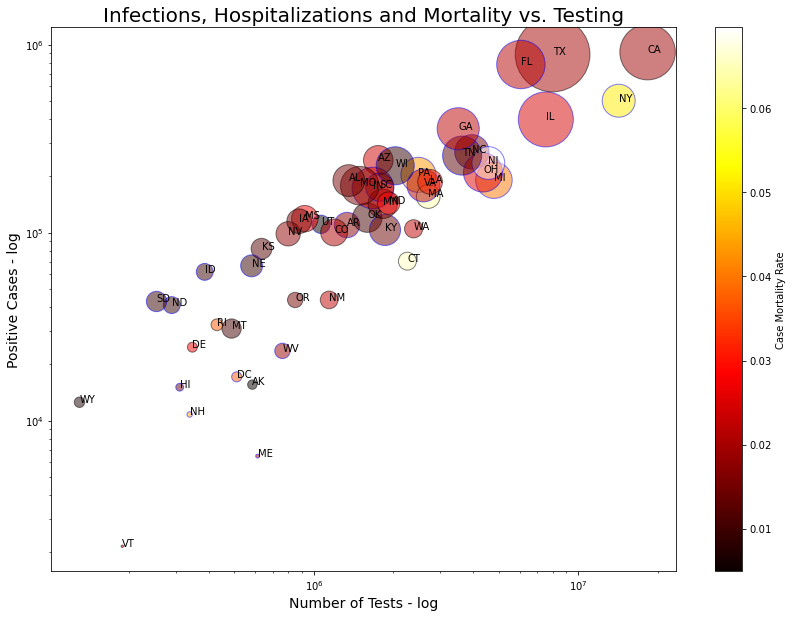

In [15]:
# I want to visualize the relationship between positive tests and overall tests.

#First get the states
states = set(jsData['state'])

#Define some empty dictionaries to populate for the variables of interest

statesTest = {}
statesPos = {}
statesHosp = {}
statesDeath = {}
statesNormPos = {}

#Iterate through each state and grab the max of each state

maxDeath = max(jsData['death'])
minDeath = min(jsData['death'])
for state in states:
    if state != 'AS':
        stateData = jsData.loc[jsData['state'] == state, :]
        stateTest = max(stateData['total'])
        statePos = max(stateData['positive'])
        stateHosp = stateData['hospitalizedCurrently'].iloc[0]
        stateDeath = max(stateData['death'])
        stateNormPos = max(stateData['positivePerCapita'])
        statesTest[state] = stateTest
        statesPos[state] = statePos
        statesHosp[state] = stateHosp
        statesDeath[state] = stateDeath
        statesNormPos[state] = stateNormPos

sortedHosp = {k: v for k, v in sorted(statesHosp.items(), key = lambda item: item[1])}

# Create a color map
tests = np.array(list(statesTest.values()))
pos = np.array(list(statesPos.values()))
hosp = np.array(list(statesHosp.values()))
deaths = np.array(list(statesDeath.values()))
normPos = np.array(list(statesNormPos.values()))
normDeaths = np.nan_to_num(deaths)
normDeaths = normDeaths/pos
cNorm = matplotlib.colors.Normalize(vmin=min(normDeaths), vmax=max(normDeaths))
scalarMap = cm.ScalarMappable(norm=cNorm, cmap='hot')
states = np.array(list(statesTest.keys()))

#Create the figure and annotate with state abbreviations

fig = plt.figure(figsize = (14, 10))
_=plt.scatter(tests, pos, s = hosp, c=scalarMap.to_rgba(normDeaths), alpha = 0.5, edgecolor = 'bk')
_=plt.xscale('log')
_=plt.yscale('log')
fig.colorbar(scalarMap, label ='Case Mortality Rate')
for state in statesTest.keys():
    _=plt.text(statesTest[state], statesPos[state], state)
_=plt.title('Infections, Hospitalizations and Mortality vs. Testing', fontsize = 20)
_=plt.xlabel('Number of Tests - log', fontsize = 14)
_=plt.ylabel('Positive Cases - log', fontsize = 14)



This plot clearly shows that there is a linear relationship between the log(positive cases) and the log(total tests). There is also a clear relationship between positive cases and current hospitalizations. However, it isn't really fair to compare the total number of tests and total tests between large states like Texas and California to states with significantly lower overall populations like Wyoming and the Dakotas. If we normalize the overall infections by the population of the states we can get a better understanding of how each state compares to one another directly with respect to infection rates in the population. 

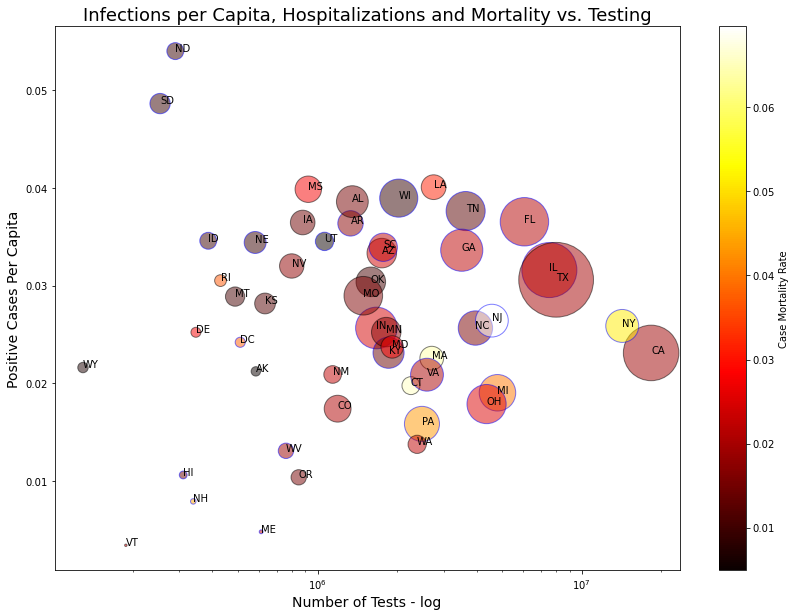

In [16]:
#Percaptia 

fig = plt.figure(figsize = (14, 10))
_=plt.scatter(tests, normPos, s = hosp, c=scalarMap.to_rgba(normDeaths), alpha = 0.5, edgecolor = 'bk')
_=plt.xscale('log')
#plt.yscale('log')
fig.colorbar(scalarMap, label ='Case Mortality Rate')
for state in statesTest.keys():
    _=plt.text(statesTest[state], statesNormPos[state], state)
_=plt.title('Infections per Capita, Hospitalizations and Mortality vs. Testing', fontsize = 18)
_=plt.xlabel('Number of Tests - log', fontsize = 14)
_=plt.ylabel('Positive Cases Per Capita', fontsize = 14)


It appears that most of the states have an infection rate between 2%-4%, with the Dakotas having the highgest infection rates. It would be interesting to see if there are any differences between the positive to overall testing ratios across states. Of course, once again, these ratios need to be normalized by population. 

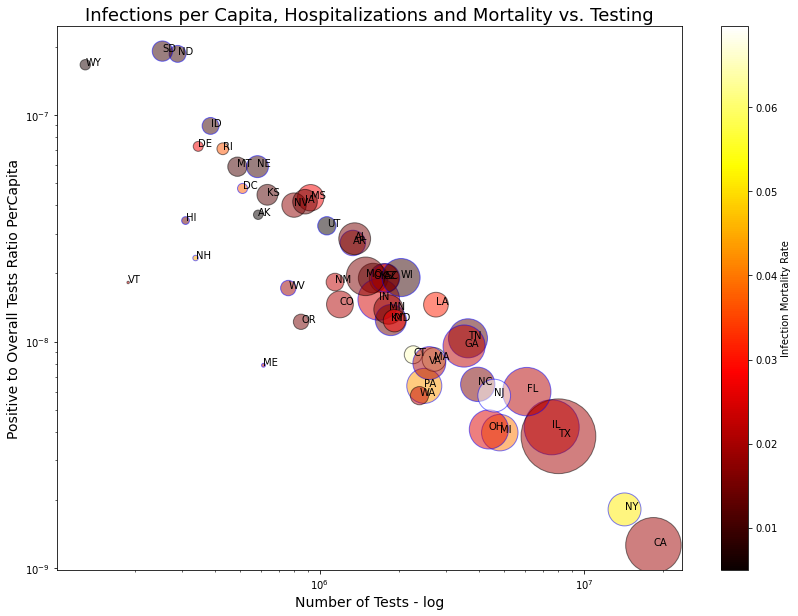

In [17]:
#Percaptia normalized by tests

fig = plt.figure(figsize = (14, 10))
_=plt.scatter(tests,normPos/tests, s = hosp, c=scalarMap.to_rgba(normDeaths), alpha = 0.5, edgecolor = 'bk')
_=plt.xscale('log')
_=plt.yscale('log')
fig.colorbar(scalarMap, label ='Infection Mortality Rate')
for state in statesTest.keys():
    _=plt.text(statesTest[state], statesNormPos[state]/statesTest[state], state)
_=plt.title('Infections per Capita, Hospitalizations and Mortality vs. Testing', fontsize = 18)
_=plt.xlabel('Number of Tests - log', fontsize = 14)
_=plt.ylabel('Positive to Overall Tests Ratio PerCapita', fontsize = 14)

It appears there is a strong linear relationship between the positve test ratio percapita and the overall number of tests. This makes some sense if you consider that if you limit testing to only individuals who are relatively ill, you will likely capture more positive cases and the states with the highest positive test ratio are smaller states. 


While these plots are all interesting, they only represent a snapshot of the data. It would be interesting to see how some of these metrics have changed over time. I'll need to replace some NaNs in the data set to facilitate allowing these plots to change over time. 

In [18]:
jsData.fillna(0, inplace = True)

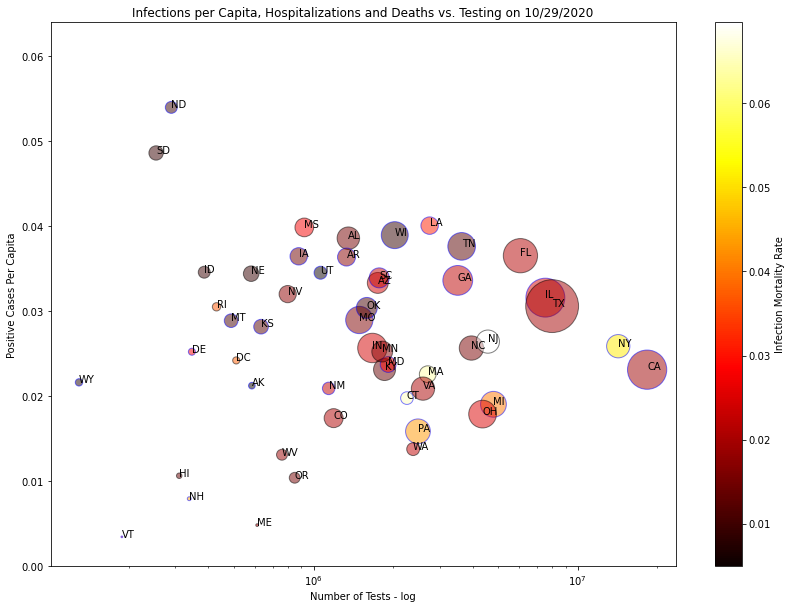

In [19]:
dateIndex = np.arange(jsData.date.nunique(), 0, -1)
dateIndex -=1
indexer = len(dateIndex) - 51
#fig = plt.figure(figsize = (14, 10))
%matplotlib inline
for t in reversed(dateIndex[:indexer]):
    
    #First filter the data by the date index selected by the slider
    clear_output(wait = True)
    pltData = jsData[jsData['date'] <= jsData.date.unique()[dateIndex[t]]]
    
    #Next define the variables for plotting: total tests, positive test per capita, total currently hospitalized
    #and ifection mortality rate. 

    tests = pltData.groupby('state').total.max()
    positivePerCapita = pltData.groupby('state').positivePerCapita.max()
    hosp = pltData.groupby('state').hospitalizedCurrently.first()
    pos = pltData.groupby('state').positive.max()
    deaths = pltData.groupby('state').death.max()

    # Create a color map
    maxDeath = max(pltData['death'])
    minDeath = min(pltData['death'])
    normDeaths = np.nan_to_num(deaths)
    normDeaths = normDeaths/pos
    cNorm = matplotlib.colors.Normalize(vmin=min(normDeaths), vmax=max(normDeaths))
    scalarMap = cm.ScalarMappable(norm=cNorm, cmap='hot')
    #Create the figure, set limits and plot the data
    fig = plt.figure(figsize = (14, 10))
    _=plt.ylim((0, max(jsData.positivePerCapita) + 0.01))
    _=plt.scatter(tests, positivePerCapita, s = hosp/2, c=scalarMap.to_rgba(normDeaths), alpha = 0.5, edgecolor = 'bk')
    _=plt.xscale('log')
    fig.colorbar(scalarMap, label ='Infection Mortality Rate')
    for state in pltData.state.unique():
        _=plt.text(tests[state], positivePerCapita[state], state)
    _=plt.title('Infections per Capita, Hospitalizations and Deaths vs. Testing on ' + str(pd.to_datetime(jsData.date.unique()[dateIndex[t]]).strftime('%m/%d/%Y')))
    _=plt.xlabel('Number of Tests - log')
    _=plt.ylabel('Positive Cases Per Capita')
    _=plt.show()

The animation clearly shows that most states infection rates grew concurrently. However, it would also be interesting to have a tool that would allow us to examine these data for any date rather than just watching the animation. I'll create an interactive version of this animation using a slider. 

In [20]:
# The slider doesn't work with dates so I need to create an index of integers for the slider to use that I can use 
# to look up the date. 

dateIndex = np.arange(jsData.date.nunique(), 0, -1)
dateIndex -=1

fig = plt.figure(figsize = (14, 10))
#Create the slider and define the function to execute when the slider moves.

@interact(t = IntSlider(value = 100, min = 50, max = max(dateIndex)))
def scatterplot_(t):
    
    #First filter the data by the date index selected by the slider
    
    pltData = jsData[jsData['date'] <= jsData.date.unique()[dateIndex[t]]]
    
    #Next define the variables for plotting: total tests, positive test per capita, total currently hospitalized
    #and ifection mortality rate. 

    tests = pltData.groupby('state').total.max()
    positivePerCapita = pltData.groupby('state').positivePerCapita.max()
    hosp = pltData.groupby('state').hospitalizedCurrently.first()
    pos = pltData.groupby('state').positive.max()
    deaths = pltData.groupby('state').death.max()

    # Create a color map
    maxDeath = max(pltData['death'])
    minDeath = min(pltData['death'])
    normDeaths = np.nan_to_num(deaths)
    normDeaths = normDeaths/pos
    cNorm = matplotlib.colors.Normalize(vmin=min(normDeaths), vmax=max(normDeaths))
    scalarMap = cm.ScalarMappable(norm=cNorm, cmap='hot')
    #Create the figure, set limits and plot the data
    fig = plt.figure(figsize = (14, 10))
    _=plt.ylim((0, max(jsData.positivePerCapita) + 0.01))
    _=plt.scatter(tests, positivePerCapita, s = hosp/4, c=scalarMap.to_rgba(normDeaths), alpha = 0.5, edgecolor = 'bk')
    _=plt.xscale('log')
    fig.colorbar(scalarMap, label ='Normalized Deaths')
    for state in pltData.state.unique():
        _=plt.text(tests[state], positivePerCapita[state], state)
    _=plt.title('Infections per Capita, Hospitalizations and Mortality vs. Testing on ' + str(pd.to_datetime(jsData.date.unique()[dateIndex[t]]).strftime('%m/%d/%Y')), fontsize = 18)
    _=plt.xlabel('Number of Tests - log', fontsize = 14)
    _=plt.ylabel('Positive Cases Per Capita', fontsize = 14)
    _=plt.show()

<Figure size 1008x720 with 0 Axes>

interactive(children=(IntSlider(value=100, description='t', max=281, min=50), Output()), _dom_classes=('widget…